BIOS Final Project

For the final project, we will work with the world cup data from TidyTuesday

Use read_csv to load the data from the TidyTuesday GitHub repository. The project URL is can be found at
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-11-29/worldcups.csv

In [1]:
library ('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
world_cup=read_csv (
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-11-29/worldcups.csv',
    col_types= cols()
    )

In [3]:
world_cup |> head ()

year,host,winner,second,third,fourth,goals_scored,teams,games,attendance
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,434000
1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,395000
1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,483000
1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1337000
1954,Switzerland,West Germany,Hungary,Austria,Uruguay,140,16,26,943000
1958,Sweden,Brazil,Sweden,France,West Germany,126,16,35,868000


Each row of the table represents one world cup

Make a table of how many times of winner country in the world cup

In [4]:
world_cup|>
        group_by(winner)|>
        count()

winner,n
<chr>,<int>
Argentina,2
Brazil,5
England,1
France,2
Germany,1
Italy,4
Spain,1
Uruguay,2
West Germany,3


Make a bar chart 📊 sorted by frequency of world cup winners by descending order. 

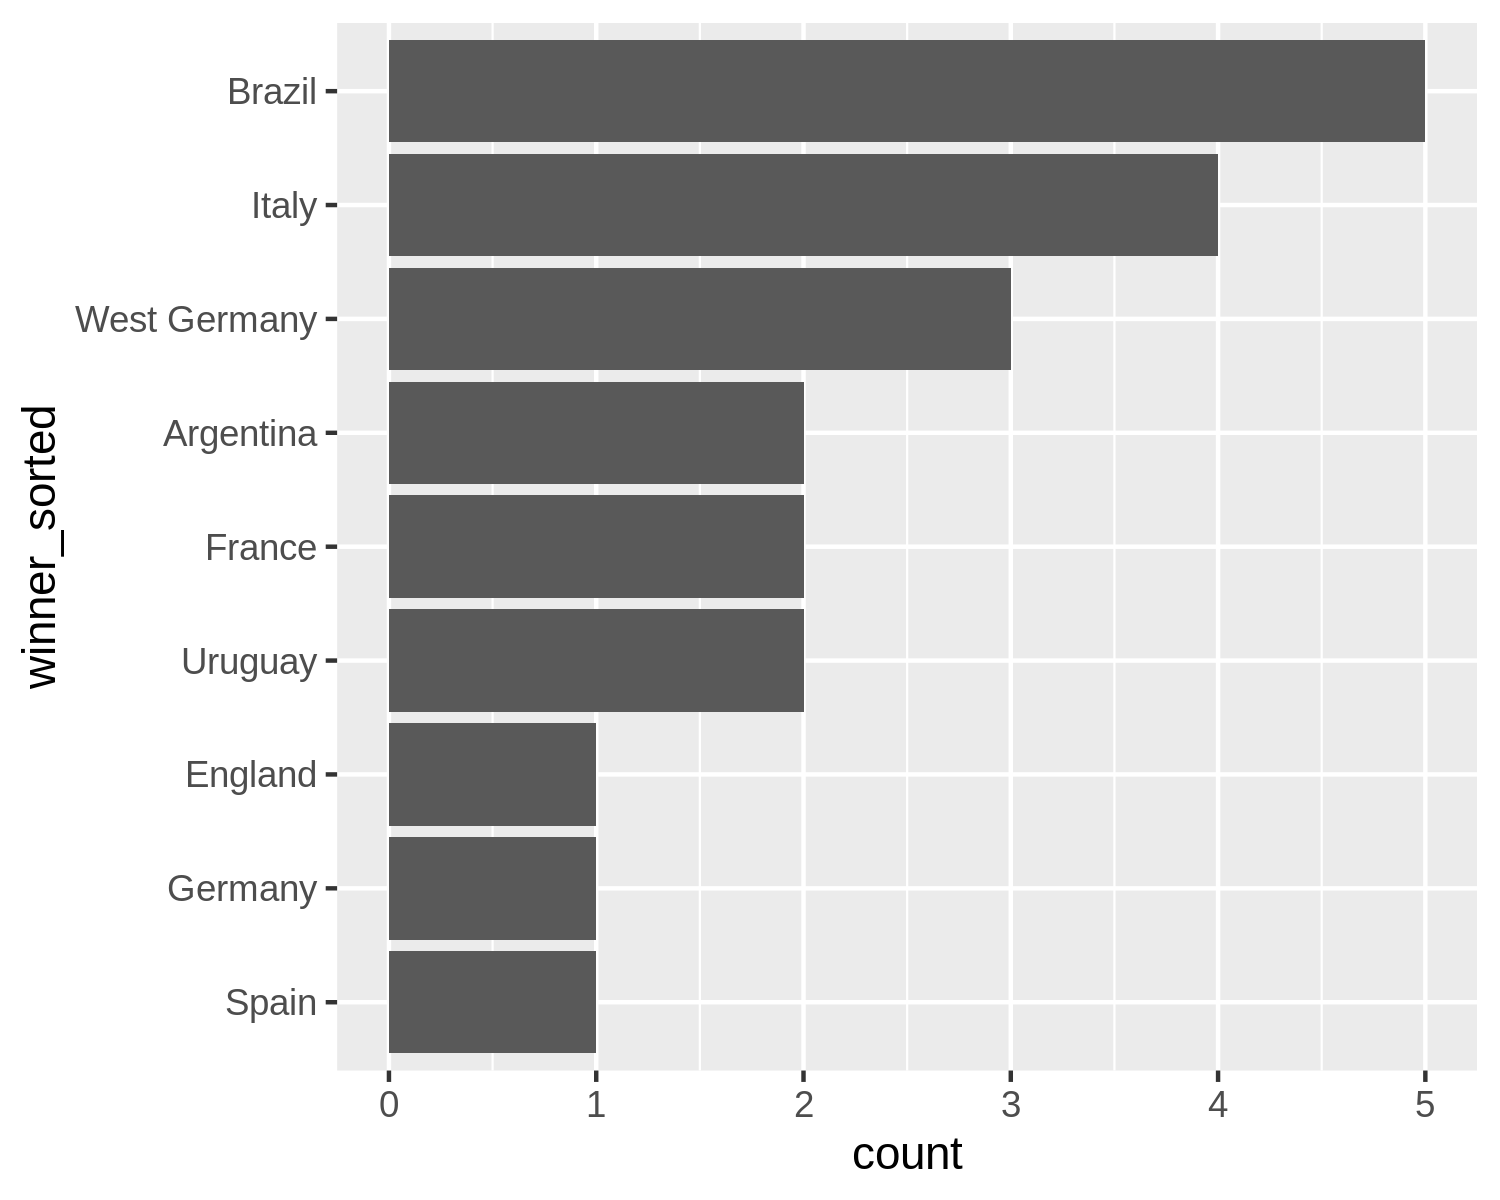

In [5]:
world_cup_winner= world_cup|>
                          group_by(winner)|>
                          ungroup(winner)|>
                          mutate(winner_sorted = winner |> fct_infreq() |> fct_rev())

p=ggplot(world_cup_winner,aes(x=winner_sorted))
p= p+ geom_bar()+ coord_flip()
p
         

Make a scatter plot to show the max attendance of each host at world cup

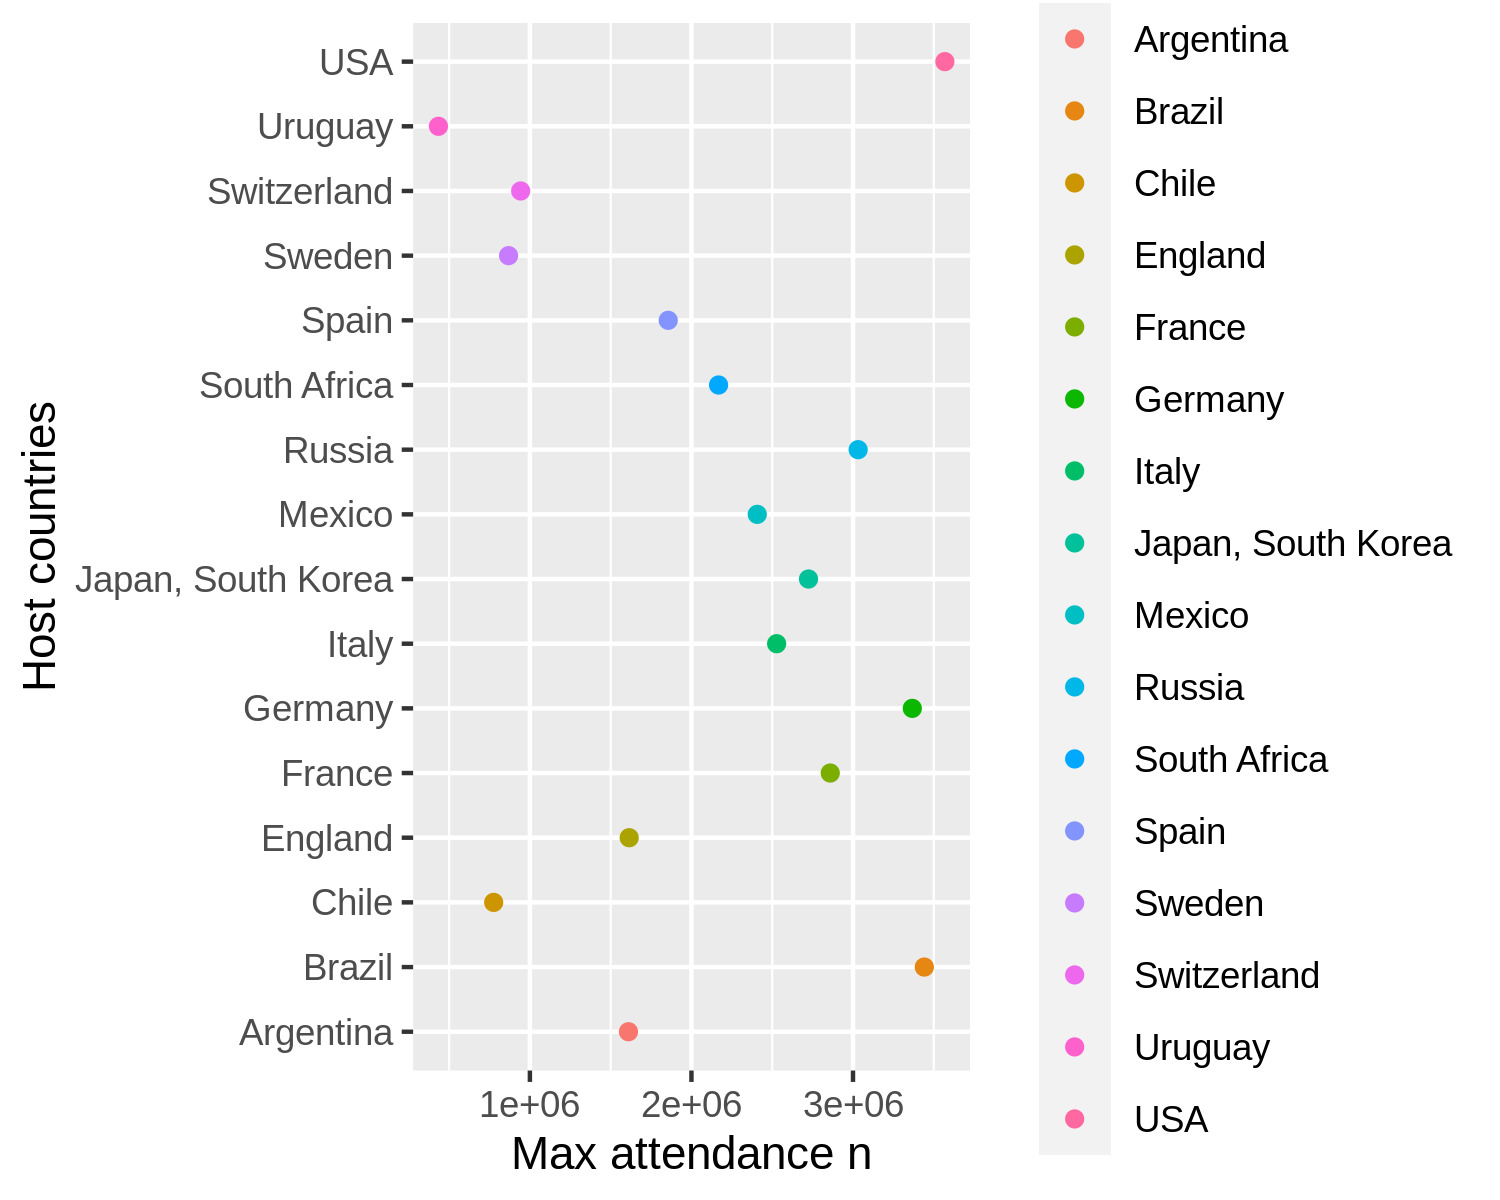

In [14]:
world_cup_attendance= world_cup|>
                             group_by(host)|>
                             summarize(max_attendance = max(attendance))

p=ggplot(world_cup_attendance,aes(x=host, y=max_attendance,color=host))+
  geom_point(na.rm = T)+coord_flip()+
  labs(x = 'Host countries', y = 'Max attendance n', color = 'host')
p
